### Given two list of x and y coordinates, and a list of errors on y, find the straight line that minimizes the sum of distances between the line and the (x,y) points.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [8]:
xdata = np.array([760 -540,
820-540,
880-540,
940-540,
1000-540,
1060-540,
1120-540,
1180-540,
1240-540])
ydata = np.array([15.46,
15.48,
15.5,
15.52,
15.54,
15.56,
15.57,
15.59,
15.61])
yerr = np.array([0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01])
if (len(xdata)!=len(ydata)): print ("dimensioni vettori disuguali")
if (len(yerr)!=len(ydata)): print ("dimensioni vettori disuguali")
npoint = len(xdata)
npoint

9

Determiniamo i parametri $a$ and $b$ della retta di best fit $y = b x + a$ che minimizza:
$ \chi^2 = \sum_i \frac{(y_i - b x_i - a)^2}{\sigma_i^2}$
    
$a$ e $b$ sono soluzioni del sistema lineare:
$\begin{bmatrix}
\sum_i \frac{1}{\sigma_i^2} & \sum_i \frac{x_i}{\sigma_i^2}\\
\sum_i \frac{x_i}{\sigma_i^2} & \sum_i \frac{x_i^2}{\sigma_i^2}
\end{bmatrix}$
$\begin{bmatrix} a\\b \end{bmatrix}$ = 
$\begin{bmatrix} \sum_i \frac{y_i}{\sigma_i^2} \\ \sum_i \frac{x_i y_i}{\sigma_i^2}\end{bmatrix}$

In forma matriciale : DA = B quindi A = D^(-1)B

In [9]:
yerrSq = yerr*yerr
sum_one_over_yerrSq = (1./yerrSq).sum()
sum_x_over_yerrSq = (xdata/yerrSq).sum()
sum_xSq_over_yerrSq = (xdata*xdata/yerrSq).sum()
sum_y_over_yerrSq = (ydata/yerrSq).sum()
sum_xy_over_yerrSq = (xdata*ydata/yerrSq).sum()

Calcolo Coefficiente correlazione lineare

In [10]:
sum_x = (xdata).sum()
sum_y = (ydata).sum()
xmean=sum_x/npoint
ymean=sum_y/npoint
ameanx=xdata-xmean
varx = (ameanx*ameanx).sum()
devstx = np.sqrt(varx)
ameany = ydata-ymean
vary = (ameany*ameany).sum()
devsty = np.sqrt(vary)
covxy = (ameanx*ameany).sum()
corrcoeff=covxy/(devstx*devsty)
print ("coefficiente correlazione = ",corrcoeff)


coefficiente correlazione =  0.9984210836086022


In [11]:
matD = np.array([[sum_one_over_yerrSq,sum_x_over_yerrSq],[sum_x_over_yerrSq,sum_xSq_over_yerrSq]])
matD

array([[9.0000e+04, 4.1400e+07],
       [4.1400e+07, 2.1204e+10]])

In [12]:
matD_inv = np.linalg.inv(matD)
matD_inv

array([[ 1.09074074e-04, -2.12962963e-07],
       [-2.12962963e-07,  4.62962963e-10]])

Check D^(-1)D = I

In [13]:
np.dot(matD,matD_inv)

array([[1., 0.],
       [0., 1.]])

In [14]:
matB = np.array([sum_y_over_yerrSq,sum_xy_over_yerrSq])
matB

array([1.39830e+06, 6.43884e+08])

In [15]:
np.dot(matD_inv,matB)

array([1.53948333e+01, 3.08333333e-04])

Calcolo parametri fit

In [16]:
a, b = np.dot(matD_inv,matB)[0],np.dot(matD_inv,matB)[1]
print (" intercetta a (u.m.)= ", a)
print (" coeff.angolare b (u.m.)= ", b)

 intercetta a (u.m.)=  15.39483333333331
 coeff.angolare b (u.m.)=  0.0003083333333332994


Calcolo errori sui parametri

In [17]:
siga, sigb = np.sqrt(matD_inv[0,0]), np.sqrt(matD_inv[1,1])
print (" errore su intercetta siga (u.m.)= ",siga)
print (" errore su coeff.angolare sigb (u.m.)= ",sigb)

 errore su intercetta siga (u.m.)=  0.010443853411173196
 errore su coeff.angolare sigb (u.m.)=  2.1516574145596753e-05


Plot

<ErrorbarContainer object of 3 artists>

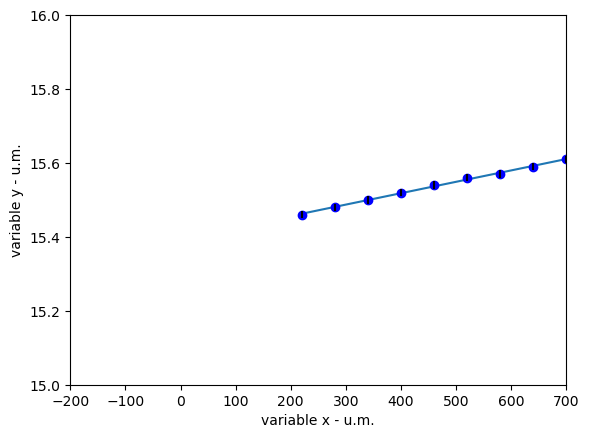

In [18]:
fig, ax = plt.subplots()
ax.set_ylim(15,16)
ax.set_xlim(-200, 700)
ax.set_xlabel('variable x - u.m.')
ax.set_ylabel('variable y - u.m.')
plt.plot(xdata,b*xdata+a,xdata,ydata,'bo')
plt.errorbar(xdata,ydata,yerr=yerr,ecolor='black', ls=" ")

Calcolo X^2 e errore standard della stima

In [19]:
scarto1 = (ydata-a-b*xdata)/yerr
scarto2 = (ydata-a-b*xdata)
chi2 = (scarto1*scarto1).sum()
errstSq = (scarto2*scarto2/(npoint-2)).sum()
errst = np.sqrt(errstSq)
print (" Chi^2 = ",chi2)
print (" errore standard della stima (u.m.) = ",errst)

 Chi^2 =  0.6499999999999131
 errore standard della stima (u.m.) =  0.0030472470011000167


In [20]:
#Intercetta con retta vert     x = 843      e retta    y = 15.281636363636395 + 0.00031x

In [21]:
intercettay = a + b*843 
intercettay

15.65475833333328